In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_probability as tfp
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt

### 1. Inspect on how the tensorflow probability distribution works
* https://www.tensorflow.org/probability/examples/TensorFlow_Distributions_Tutorial

In [2]:
mu = 5
sigma = 1

#Create the probabilities distribution
probabilities = tfp.distributions.Normal(mu, sigma)

#Here, we just sample on action
actions = probabilities.sample().numpy()

In [3]:
# Sample 1000 items from the probability distribution in order to see how the distribution looks like
probability_list = []
for i in range(0,1000):
    probability_list.append(probabilities.sample().numpy())

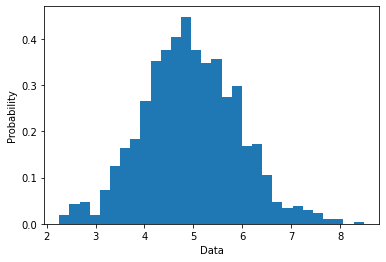

In [4]:
plt.hist(probability_list, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

### 2. Get an action: squeeze the sampled actions from the Gaussian distribution through the tanh and multiply by max_action

In [5]:
#This max_action is defined by the environment, however, we just set it to a random number here
max_action = 2

action = tf.math.tanh(actions)*max_action

In [6]:
actions

6.081686

In [7]:
#The actions squeezed through a hyperbolic tangent function
action

<tf.Tensor: shape=(), dtype=float32, numpy=1.9999794>

### 3. Get the log probabilities for the actions (the log of the probability)
Info on softmax (converts values into probabilities that sum up to 1):
* https://towardsdatascience.com/softmax-function-simplified-714068bf8156#:~:text=Our%20output%20for%20the%20Softmax,by%20the%20feature%20matrix%20x.

In [46]:
from sklearn.utils.extmath import softmax

#### Calculation of probs and logprobs when you have certain values

In [53]:
actions = np.array([[10,5,0.6,0.2,0.8]])
action_probabilities = softmax(actions)
print(action_probabilities)
log_probs = np.log(action_probabilities)
print(log_probs)

[[9.93071181e-01 6.69126099e-03 8.21508855e-05 5.50673854e-05
  1.00339318e-04]]
[[-6.95293430e-03 -5.00695293e+00 -9.40695293e+00 -9.80695293e+00
  -9.20695293e+00]]


#### Calculation of probs and logprobs when you have a probability density function

In [59]:
dir(probabilities)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_allow_nan_stats',
 '_batch_shape',
 '_batch_shape_tensor',
 '_call_cdf',
 '_call_log_cdf',
 '_call_log_prob',
 '_call_log_survival_function',
 '_call_prob',
 '_call_quantile',
 '_call_sample_n',
 '_call_survival_function',
 '_cdf',
 '_checkpoint_dependencies',
 '_composite_tensor_nonshape_params',
 '_composite_tensor_params',
 '_composite_tensor_shape_params',
 '_covariance',
 '_cross_entropy',
 '_default_event_space_bijector',
 '_deferred_dependencies',
 '_dtype',
 '_entropy',
 '_eve

In [63]:
print(probabilities.stddev())
print(probabilities.mean())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)


In [68]:
actions = np.array([[-10, 2, 4.98, 5, 5.02, 8, 20]])
probs = probabilities.prob(actions)
print(probs)
log_probs = probabilities.log_prob(actions)
print(log_probs)

tf.Tensor(
[[0.         0.00443185 0.3988625  0.3989423  0.3988625  0.00443185
  0.        ]], shape=(1, 7), dtype=float32)
tf.Tensor(
[[-113.41894     -5.4189386   -0.9191385   -0.9189385   -0.9191385
    -5.4189386 -113.41894  ]], shape=(1, 7), dtype=float32)
